<a href="https://colab.research.google.com/github/gustavowcruz/estudo-pandas/blob/main/Estudo_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

brics = {
    "country": ["Brazil", "Russia", "India", "China", "South Africa"],
    "capital": ["Brasilia", "Moscow", "New Delhi", "Beijing", "Pretoria"],
    "area": [8.516, 17.10, 3.286, 9.597, 1.221],
    "population": [200.4, 143.5, 1252, 1357, 52.98],
    "continent": ["America", "Europe", "Asia", "Asia", "Africa"]
}
brics = pd.DataFrame(brics)
brics.index = ["BR", "RU", "IN", "CH", "SA"]

brics[["country","capital"]]

,country,capital
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing
SA,South Africa,Pretoria


In [ ]:
brics['area'].corr(brics['population'])

np.float64(-0.15723426045273287)

In [ ]:
# paises que não são da asia
not_asia = ~brics["continent"].isin(["Asia"])
print(brics[not_asia])

         country   capital    area  population continent
BR        Brazil  Brasilia   8.516      200.40   America
RU        Russia    Moscow  17.100      143.50    Europe
SA  South Africa  Pretoria   1.221       52.98    Africa


In [ ]:
brics.agg({'area': 'sum', 'population': 'mean'})

,0
area,39.720
population,601.176


<Axes: xlabel='area', ylabel='population'>

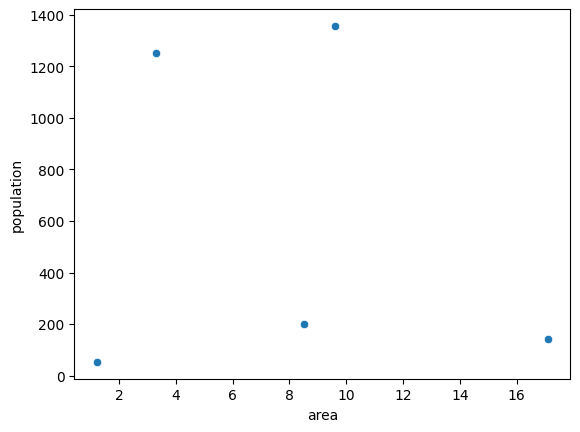

In [ ]:
sns.scatterplot(x="area", y="population", data=brics)

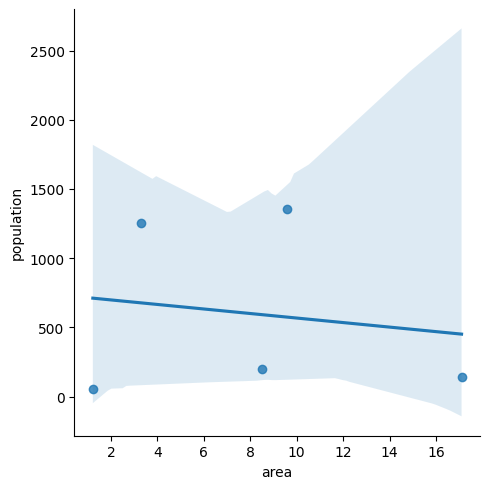

In [ ]:
sns.lmplot(x="area", y="population", data=brics)

In [ ]:
np.random.seed(4)
brics.sample(2)

,country,capital,area,population,continent
BR,Brazil,Brasilia,8.516,200.4,America
CH,China,Beijing,9.597,1357.0,Asia


In [ ]:
np.random.seed(1)
brics.sample(5, replace=True)

,country,capital,area,population,continent
CH,China,Beijing,9.597,1357.00,Asia
SA,South Africa,Pretoria,1.221,52.98,Africa
BR,Brazil,Brasilia,8.516,200.40,America
RU,Russia,Moscow,17.100,143.50,Europe
CH,China,Beijing,9.597,1357.00,Asia


In [ ]:
brics.query('area >= 5')

,country,capital,area,population,continent
BR,Brazil,Brasilia,8.516,200.4,America
RU,Russia,Moscow,17.100,143.5,Europe
CH,China,Beijing,9.597,1357.0,Asia


In [ ]:
brics[0:3]

,country,capital,area,population,continent
BR,Brazil,Brasilia,8.516,200.4,America
RU,Russia,Moscow,17.100,143.5,Europe
IN,India,New Delhi,3.286,1252.0,Asia


In [ ]:
brics.loc[
    ["RU","BR","CH"],
    ['capital', 'country']
    ]

,capital,country
RU,Moscow,Russia
BR,Brasilia,Brazil
CH,Beijing,China


In [ ]:
brics.loc[:, ["country","capital"]]

,country,capital
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing
SA,South Africa,Pretoria


In [ ]:
brics.iloc[[1, 3], [0,1]]

,country,capital
RU,Russia,Moscow
CH,China,Beijing


In [ ]:
brics.iloc[
    :,
    [0,1]
]

,country,capital
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing
SA,South Africa,Pretoria


In [ ]:
brics["area"]

,area
BR,8.516
RU,17.100
IN,3.286
CH,9.597
SA,1.221


In [ ]:
brics.loc[:, "area"]

,area
BR,8.516
RU,17.100
IN,3.286
CH,9.597
SA,1.221


In [ ]:
brics.iloc[:, 2]

,area
BR,8.516
RU,17.100
IN,3.286
CH,9.597
SA,1.221


In [ ]:
is_huge = brics["area"] > 8
brics[is_huge]

,country,capital,area,population,continent
BR,Brazil,Brasilia,8.516,200.4,America
RU,Russia,Moscow,17.100,143.5,Europe
CH,China,Beijing,9.597,1357.0,Asia


In [ ]:
brics[brics["area"] > 8]

,country,capital,area,population,continent
BR,Brazil,Brasilia,8.516,200.4,America
RU,Russia,Moscow,17.100,143.5,Europe
CH,China,Beijing,9.597,1357.0,Asia


In [ ]:
np.logical_and(brics["area"] > 8, brics["area"] < 10)

,area
BR,True
RU,False
IN,False
CH,True
SA,False


In [ ]:
#calcula a moda
brics["country"].value_counts()

,count
country,
Brazil,1
Russia,1
India,1
China,1
South Africa,1


In [ ]:
order = brics.sort_values("country", ascending=True)
order.iloc[0:2, :]

,country,capital,area,population,continent
BR,Brazil,Brasilia,8.516,200.4,America
CH,China,Beijing,9.597,1357.0,Asia


In [ ]:
brics[
    (brics["area"] > 8) & (brics["population"] > 150)
    ]

,country,capital,area,population,continent
BR,Brazil,Brasilia,8.516,200.4,America
CH,China,Beijing,9.597,1357.0,Asia


In [ ]:
brics[(brics["area"] > 3) & (brics["area"] < 10)]

,country,capital,area,population,continent
BR,Brazil,Brasilia,8.516,200.4,America
IN,India,New Delhi,3.286,1252.0,Asia
CH,China,Beijing,9.597,1357.0,Asia


In [ ]:
is_asian_or_africa = brics["continent"].isin(["Asia", "Africa"])
brics[is_asian_or_africa]

,country,capital,area,population,continent
IN,India,New Delhi,3.286,1252.00,Asia
CH,China,Beijing,9.597,1357.00,Asia
SA,South Africa,Pretoria,1.221,52.98,Africa


In [ ]:
brics['density'] = brics["population"] / brics["area"]
brics

,country,capital,area,population,continent,density
BR,Brazil,Brasilia,8.516,200.40,America,23.532175
RU,Russia,Moscow,17.100,143.50,Europe,8.391813
IN,India,New Delhi,3.286,1252.00,Asia,381.010347
CH,China,Beijing,9.597,1357.00,Asia,141.398354
SA,South Africa,Pretoria,1.221,52.98,Africa,43.390663


In [ ]:
brics['cum_populatation'] = brics["population"].cumsum()
brics['max_populatation'] = brics["population"].cummax()
brics['min_populatation'] = brics["population"].cummin()
brics['prod_populatation'] = brics["population"].cumprod()
brics

,country,capital,area,population,continent,density,cum_populatation,max_populatation,min_populatation,prod_populatation
BR,Brazil,Brasilia,8.516,200.40,America,23.532175,200.40,200.4,200.40,2.004000e+02
RU,Russia,Moscow,17.100,143.50,Europe,8.391813,343.90,200.4,143.50,2.875740e+04
IN,India,New Delhi,3.286,1252.00,Asia,381.010347,1595.90,1252.0,143.50,3.600426e+07
CH,China,Beijing,9.597,1357.00,Asia,141.398354,2952.90,1357.0,143.50,4.885779e+10
SA,South Africa,Pretoria,1.221,52.98,Africa,43.390663,3005.88,1357.0,52.98,2.588486e+12


In [ ]:
print('mediana: ', brics["population"].median())
print('média: ', brics["population"].mean())
print('desvio padrão: ', brics["population"].std())
print('variância: ' ,brics["population"].var())

mediana:  200.4
média:  601.176
desvio padrão:  645.2614538929162
variância:  416362.34388


In [ ]:
area_order = brics.sort_values("area", ascending=False)
area_order

,country,capital,area,population,continent,density,cum_populatation,max_populatation,min_populatation,prod_populatation
RU,Russia,Moscow,17.100,143.50,Europe,8.391813,343.90,200.4,143.50,2.875740e+04
CH,China,Beijing,9.597,1357.00,Asia,141.398354,2952.90,1357.0,143.50,4.885779e+10
BR,Brazil,Brasilia,8.516,200.40,America,23.532175,200.40,200.4,200.40,2.004000e+02
IN,India,New Delhi,3.286,1252.00,Asia,381.010347,1595.90,1252.0,143.50,3.600426e+07
SA,South Africa,Pretoria,1.221,52.98,Africa,43.390663,3005.88,1357.0,52.98,2.588486e+12


In [ ]:
#conta o número de valores iguais
print(area_order['continent'].value_counts())
print('='*20)
print('Análise proporcional')
print(area_order['continent'].value_counts(normalize=True))

continent
Asia       2
Europe     1
America    1
Africa     1
Name: count, dtype: int64
Análise proporcional
continent
Asia       0.4
Europe     0.2
America    0.2
Africa     0.2
Name: proportion, dtype: float64


In [ ]:
area_order.drop_duplicates(subset="continent")

,country,capital,area,population,continent,density,cum_populatation,max_populatation,min_populatation,prod_populatation
RU,Russia,Moscow,17.100,143.50,Europe,8.391813,343.90,200.4,143.50,2.875740e+04
CH,China,Beijing,9.597,1357.00,Asia,141.398354,2952.90,1357.0,143.50,4.885779e+10
BR,Brazil,Brasilia,8.516,200.40,America,23.532175,200.40,200.4,200.40,2.004000e+02
SA,South Africa,Pretoria,1.221,52.98,Africa,43.390663,3005.88,1357.0,52.98,2.588486e+12


In [ ]:
area_order.groupby(['continent'])["population"].sum()

,population
continent,
Africa,52.98
America,200.40
Asia,2609.00
Europe,143.50


In [ ]:
area_order.pivot_table(values="population", index="continent", aggfunc=np.mean)

<ipython-input-33-db0421ade482>:1: FutureWarning: The provided callable <function mean at 0x7866eb7ba340> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  area_order.pivot_table(values="population", index="continent", aggfunc=np.mean)


,population
continent,
Africa,52.98
America,200.40
Asia,1304.50
Europe,143.50


In [ ]:
area_order.pivot_table(values="population", index="continent", columns = "country", aggfunc=np.sum, fill_value=0, margins=True)

<ipython-input-34-d8a16acbcbca>:1: FutureWarning: The provided callable <function sum at 0x7866eb7b9260> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  area_order.pivot_table(values="population", index="continent", columns = "country", aggfunc=np.sum, fill_value=0, margins=True)
<ipython-input-34-d8a16acbcbca>:1: FutureWarning: The provided callable <function sum at 0x7866eb7b9260> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  area_order.pivot_table(values="population", index="continent", columns = "country", aggfunc=np.sum, fill_value=0, margins=True)
<ipython-input-34-d8a16acbcbca>:1: FutureWarning: The provided callable <function sum at 0x7866eb7b9260> is currently using DataFrameGroupBy.sum. In a future version of pandas, the pro

country,Brazil,China,India,Russia,South Africa,All
continent,,,,,,
Africa,0.0,0.0,0.0,0.0,52.98,52.98
America,200.4,0.0,0.0,0.0,0.00,200.40
Asia,0.0,1357.0,1252.0,0.0,0.00,2609.00
Europe,0.0,0.0,0.0,143.5,0.00,143.50
All,200.4,1357.0,1252.0,143.5,52.98,3005.88


df[colum].isnull.sum() = soma os valores vazios

set_index() é usado para definir um index a partir de uma coluna existente na base de dados

In [ ]:
grande_aracaju = {
    'nome': ['Aracaju', 'São Cristóvão', 'Nossa Senhora do Socorro', 'Barra dos Coqueiros'],
    'população (mi)': [600, 96, 196, 41],
    'siglas': ['ACA', 'SCR', 'SSC', 'BCO']
}

grande_aracaju = pd.DataFrame(grande_aracaju)
grande_aracaju.set_index('siglas').sort_index(level='siglas', ascending=True)

,nome,população (mi)
siglas,,
ACA,Aracaju,600
BCO,Barra dos Coqueiros,41
SCR,São Cristóvão,96
SSC,Nossa Senhora do Socorro,196


Usarei um código agora para juntar dois dataframes utilizando join

In [ ]:
movies_df = {'Id':[1,2,3,4,5],
          'Nome':['Ainda Estou Aqui','A Substância','Conclave','Wicked','Duna 2'],
          'Indicações':[3,5,8,10,5]}

movies = pd.DataFrame(movies_df)
movies = movies.set_index('Id')

movie_genres_df = {'Movie Id':[1,2,3,4,5],
                   'Gênero:':['Drama','Terror','Suspense','Musical/Comédia','Ficção']}

movie_genres = pd.DataFrame(movie_genres_df)
movie_genres = movie_genres.set_index('Movie Id')
movie_genres
movies.join(movie_genres)

,Nome,Indicações,Gênero:
Id,,,
1,Ainda Estou Aqui,3,Drama
2,A Substância,5,Terror
3,Conclave,8,Suspense
4,Wicked,10,Musical/Comédia
5,Duna 2,5,Ficção


Agora farei a mesma coisa porém usando merge no lugar

In [ ]:
movies_df = {'Id':[1,2,3,4,5],
          'Nome':['Ainda Estou Aqui','A Substância','Conclave','Wicked','Duna 2'],
          'Indicações':[3,5,8,10,5]}

movies = pd.DataFrame(movies_df)
movies = movies.set_index('Id')

movie_genres_df = {'Movie Id':[1,2,3,4,5],
                   'Gênero:':['Drama','Terror','Suspense','Musical/Comédia','Ficção']}

movie_genres = pd.DataFrame(movie_genres_df)
movie_genres = movie_genres.set_index('Movie Id')

movies.merge(movie_genres, left_index=True, right_index=True)

,Nome,Indicações,Gênero:
Id,,,
1,Ainda Estou Aqui,3,Drama
2,A Substância,5,Terror
3,Conclave,8,Suspense
4,Wicked,10,Musical/Comédia
5,Duna 2,5,Ficção


Agora irei concatenar a lista anterior com mais filmes

In [ ]:
movies_df = {'Id':[1,2,3,4,5],
          'Nome':['Ainda Estou Aqui','A Substância','Conclave','Wicked','Duna 2'],
          'Indicações':[3,5,8,10,5]}

movies = pd.DataFrame(movies_df)
movies = movies.set_index('Id')

movie_genres_df = {'Movie Id':[1,2,3,4,5],
                   'Gênero:':['Drama','Terror','Suspense','Musical/Comédia','Ficção']}

movie_genres = pd.DataFrame(movie_genres_df)
movie_genres = movie_genres.set_index('Movie Id')
movies = movies.join(movie_genres)

more_movies_df = {'Id':[6,7],
          'Nome':['Anora','O Brutalista'],
                  'Indicações':[6,6]}

more_movies = pd.DataFrame(more_movies_df)
more_movies = more_movies.set_index('Id')

more_genres_df = {'Movie Id':[6,7],
                   'Gênero:':['Comédia Dramática','Drama']}

more_genres = pd.DataFrame(more_genres_df)
more_genres = more_genres.set_index('Movie Id')

more_movies = more_movies.join(more_genres)

pd.concat([movies, more_movies])

,Nome,Indicações,Gênero:
Id,,,
1,Ainda Estou Aqui,3,Drama
2,A Substância,5,Terror
3,Conclave,8,Suspense
4,Wicked,10,Musical/Comédia
5,Duna 2,5,Ficção
6,Anora,6,Comédia Dramática
7,O Brutalista,6,Drama


In [ ]:
situacoes = {'Situação': ['Em Análise', 'Deferido', 'Indeferido']}
situacoes = pd.DataFrame(situacoes)
situacoes

,Situação
0,Em Análise
1,Deferido
2,Indeferido


In [ ]:
processos = {
            'Solicitação': ['Isenção de inscrição', 'Renovação de Senha', 'Alteração de Endereço', 'Renovação de Contrato'],
             'Situação':[0, 2, 0, 1]
            }
processos['Situação'] = processos['Situação'].map({0: 'Em Análise', 1: 'Deferido', 2: 'Indeferido'})
processos = pd.DataFrame(processos)
processos

AttributeError: 'list' object has no attribute 'map'